In [1]:
import pandas as pd

df = pd.read_csv("data/NationalNames.csv")

##### 1. Виведіть перші 8 рядків набору даних.

In [2]:
res_1 = df[:8]
print(res_1)

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414


##### 2. Вивести останні 8 рядків набору даних.

In [3]:
res_2 = df[-8:]
print(res_2)

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


##### 4. Отримайте загальну інформацію про дані у наборі даних.

In [4]:
res_4 = df.describe()
print(res_4)

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


##### 5. Знайдіть кількість унікальних імен у наборі даних.

In [5]:
res_5 = df["Name"].nunique()
print(res_5)

93889


##### 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних.

In [6]:
res_6 = df.groupby("Gender")["Name"].nunique()
print(res_6)

Gender
F    64911
M    39199
Name: Name, dtype: int64


##### 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.

In [7]:
res_7 = df[(df["Year"] == 2010) & (df["Gender"] == "M")]
res_7 = res_7.sort_values(by="Count", ascending=False).head(5)
print(res_7)

              Id     Name  Year Gender  Count
1677392  1677393    Jacob  2010      M  22082
1677393  1677394    Ethan  2010      M  17985
1677394  1677395  Michael  2010      M  17308
1677395  1677396   Jayden  2010      M  17152
1677396  1677397  William  2010      M  17030


##### 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого ```Count``` максимальне)

In [8]:
res_8 = df.sort_values(by="Count", ascending=False).iloc[0]
print(f"The name is '{res_8['Name']}' in {res_8['Year']}")

The name is 'Linda' in 1947


##### 9. Підрахуйте кількість записів, для яких ```Count``` - мінімальне у наборі.

In [9]:
min_count_value = df["Count"].min()
res_9 = df[df["Count"] == min_count_value].shape[0]
print(res_9)

254615


##### 10. Підрахуйте кількість унікальних імен у кожному році.

In [10]:
res_10 = df.groupby("Year")["Name"].nunique()
print(res_10)

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


##### 11. Знайдіть рік із найбільшою кількістю унікальних імен.

In [11]:
res_11 = res_10[res_10.values == res_10.values.max()]
print(res_11)

Year
2008    32488
Name: Name, dtype: int64


##### 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році).

In [12]:
year = res_11.index[0]
res_12 = df[df["Year"] == year]
res_12 = res_12.sort_values(by="Count", ascending=False)
res_12 = res_12.iloc[0]["Name"]
print(f"'{res_12}'")

'Jacob'


##### 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [13]:
f_df = df[df["Gender"] == "F"]
m_df = df[df["Gender"] == "M"]
f_by_year = f_df.groupby("Year")["Count"].sum().rename("F_Count")
m_by_year = m_df.groupby("Year")["Count"].sum().rename("M_Count")
f_and_m_by_year = pd.concat([f_by_year, m_by_year], axis=1)
res_18 = f_and_m_by_year[f_and_m_by_year["F_Count"] > f_and_m_by_year["M_Count"]].shape[0]
print(res_18)

54


##### 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

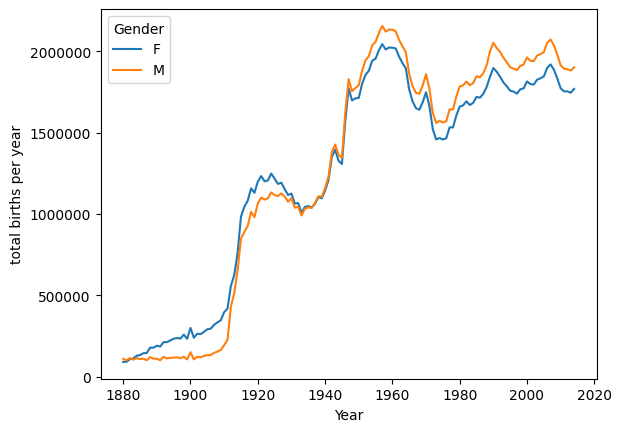

In [14]:
res_19 = df.groupby(["Year", "Gender"])["Count"].sum().unstack()
res_19 = res_19.plot()
res_19.set_xlabel("Year")
res_19.set_ylabel("total births per year")
res_19.ticklabel_format(style="plain")
res_19.legend(title="Gender");

##### 20. Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців).

In [15]:
res_20 = df.groupby("Name")
res_20 = res_20.filter(lambda x: len(set(x["Gender"].values)) == 2)
res_20 = res_20["Name"].nunique()
print(res_20)

10221


##### 21. Порахуйте, скільки разів хлопчиків називали Barbara.

In [16]:
res_21 = df[(df["Gender"] == "M") & (df["Name"] == "Barbara")]
res_21 = res_21["Count"].sum()
print(res_21)

4139


##### 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року).

In [17]:
years_n = df["Year"].nunique()
genders_n = df["Gender"].nunique()  # 2??
res_23 = df.groupby("Name")
res_23 = res_23.filter(lambda x: len(x) == 2 * years_n)
res_23 = res_23["Name"].unique()
print(res_23)

['Jessie' 'Ollie' 'Marion' 'Jean' 'Francis' 'John' 'William' 'Lee' 'James'
 'Sidney' 'Robert' 'Joseph' 'Tommie' 'Johnnie' 'Leslie' 'Jesse']


##### 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

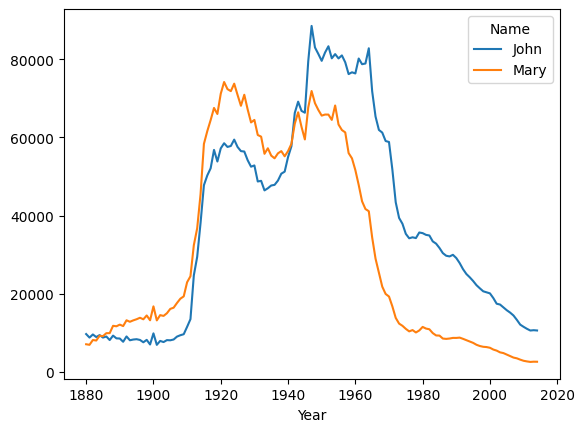

In [18]:
res_19 = df[(df["Name"] == "John") | (df["Name"] == "Mary")].groupby(["Year", "Name"])["Count"].sum().unstack()
res_19 = res_19.plot()
res_19.set_xlabel("Year")
res_19.ticklabel_format(style="plain")
res_19.legend(title="Name");

##### 27. Знайти найпопулярніші імена в кожному році.

###### Враховуючи лише стать з більшою кількістю для кожного імені:

In [19]:
res_27_1 = df.groupby("Year")
res_27_1 = res_27_1.apply(lambda x: x.sort_values(by="Count", ascending=False).head(1))
res_27_1 = res_27_1[["Year", "Name", "Count"]].set_index("Year")
print(res_27_1)

          Name  Count
Year                 
1880      John   9655
1881      John   8769
1882      John   9557
1883      John   8894
1884      John   9388
...        ...    ...
2010  Isabella  22883
2011    Sophia  21816
2012    Sophia  22267
2013    Sophia  21147
2014      Emma  20799

[135 rows x 2 columns]


###### Сумуючи обидві статі для кожного імені:

In [20]:
res_27_2 = df.groupby(["Year", "Name"]).sum().reset_index()
res_27_2 = res_27_2.groupby("Year").apply(lambda x: x.sort_values(by="Count", ascending=False).head(1))
res_27_2 = res_27_2[["Year", "Name", "Count"]].set_index("Year")
print(res_27_2)

          Name  Count
Year                 
1880      John   9701
1881      John   8795
1882      John   9597
1883      John   8934
1884      John   9428
...        ...    ...
2010  Isabella  22913
2011    Sophia  21839
2012    Sophia  22285
2013    Sophia  21172
2014      Emma  20811

[135 rows x 2 columns]
